In [35]:
# Import packages and load the data
import numpy as np
import numpy.linalg as lin
import scipy.stats as sts
import scipy.integrate as intgr
import scipy.optimize as opt
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
cmap1 = matplotlib.cm.get_cmap('summer')
# This next command is specifically for Jupyter Notebook
%matplotlib notebook

import requests
from IPython.display import Image

In [36]:
# Load the data as a NumPy array
data = np.loadtxt('usincmoms.txt')

<IPython.core.display.Javascript object>


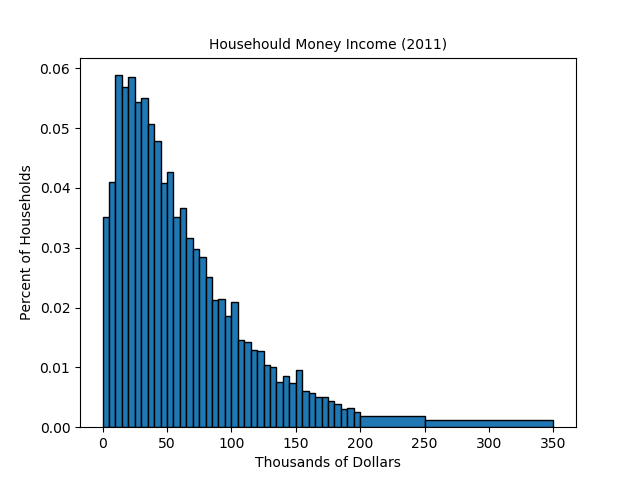

43


In [37]:
#Part (a): Plotting the Histogram
%matplotlib notebook

frequencies = data[:,0]
mid_point = data[:,1]

heights = np.copy(frequencies)
heights[40]=heights[40]/10
heights[41]=heights[41]/20

widths = 5 * np.ones(42)
widths[40] = 50
widths[41] = 100

bins = np.zeros((43,), dtype=int)
for x in range(1, 43):
    bins[0]=0
    bins[x]=bins[x-1]+(mid_point[x-1]-bins[x-1])*2

bins_g=bins/1000

plt.bar(bins_g[:-1], height=heights, width=widths, align='edge', edgecolor='k')
plt.title('Househould Money Income (2011)', fontsize=10)
plt.xlabel(r'Thousands of Dollars')
plt.ylabel(r'Percent of Households')
plt.show()

In [44]:
#Part (b): GMM estimation of the LN

# Define function that generates values of a normal pdf
def log_norm_pdf(xvals, mu, sigma):

    pdf_vals    = ((1/(xvals*sigma * np.sqrt(2 * np.pi)) *
                    np.exp( - (np.log(xvals) - mu)**2 / (2 * sigma**2))))
    
    return pdf_vals

#This variable will control the limits of integration for the model moments
limits = np.copy(bins_g)
limits[0] = 1e-10 #Because the LN distribution is not define for x=0

#Define the moments of the model
def model_moment(mu, sigma):
    area = []
    xfx = lambda x: log_norm_pdf(x, mu, sigma)
    
    for i in range(42):
        (valores, errores) = intgr.quad(xfx, limits[i], limits[i + 1])
        area.append(valores)
    
    return np.array(area)

#Define the error vector    
def err_vec(xvals, mu, sigma, simple):
    
    moms_data = xvals[:,0]
    
    moms_model = model_moment(mu, sigma)
    
    if simple:
        err_vec = moms_model - moms_data
    else:
        err_vec = (moms_model - moms_data) / moms_data
    
    return err_vec

#Criterio function
def crit(params, *args):
    mu, sigma = params
    xvals, W = args
    err = err_vec(xvals, mu, sigma, simple=False)
    crit_val = err.T @ W @ err
    return crit_val


#GMM estimation
mu_init = 11.1516255566386
sigma_init = 195
params_init = np.array([mu_init, sigma_init])

W_hat = np.eye(42)
W_hat = W_hat * frequencies
gmm_args = (incomes, W_hat)

results = opt.minimize(crit, params_init, args=(gmm_args), tol=1e-20,
                       method='L-BFGS-B', bounds=((None, None), (1e-10, None)))
mu_GMM, sigma_GMM = results.x

print(mu_GMM)
print(sigma_GMM)

77.63849998161723
44.11770754947385
